<style>
@font-face {
  font-family: 'IRANSans';
  src: url('fonts/IRANSansXFaNum-Regular.ttf') format('woff');
}
.custom-font {
  font-family: 'IRANSans';
  direction: rtl;
}
</style>

<h1 align=center style="line-height:200%;font-family:IRANSans;color:#0099cc">
<font face="IRANSans" color="#0099cc">
بخش دوم: تحلیل‌های آماری
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:IRANSans;color:#0099cc; padding-right:10px">
<font face="IRANSans" color="#0099cc">
آمار توصیفی
</font>
</h2>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
divar_df = pd.read_csv('Divar.csv')

font_path = "fonts/IRANSansXFaNum-Regular.ttf" 
font_prop = fm.FontProperties(fname=font_path)

C:\Users\Hamed\AppData\Local\Temp\ipykernel_16364\134647801.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  divar_df = pd.read_csv('Divar.csv')


<h4 align=right style="line-height:200%;font-family:IRANSans;color:#0099cc; padding-right:10px">
<font color="red"><b color='red'>مرحله اکتشاف داده‌ها (EDA = Exploratory Data Analysis)</b></font>
</h4>


In [3]:
print("Number of records (Rows):", divar_df.shape[0])
print("Number of columns (Columns):", divar_df.shape[1])

divar_df.head()

Number of records (Rows): 1000000
Number of columns (Columns): 61


Unnamed: 0         cat2_slug       cat3_slug city_slug neighborhood_slug  \
0           0    temporary-rent           villa     karaj         mehrshahr   
1           1  residential-sell  apartment-sell    tehran           gholhak   
2           2  residential-rent  apartment-rent    tehran             tohid   
3           3   commercial-rent     office-rent    tehran          elahiyeh   
4           4  residential-sell  apartment-sell   mashhad          emamreza   

      created_at_month    user_type  \
0  2024-08-01 00:00:00  مشاور املاک   
1  2024-05-01 00:00:00  مشاور املاک   
2  2024-10-01 00:00:00          NaN   
3  2024-06-01 00:00:00          NaN   
4  2024-05-01 00:00:00  مشاور املاک   

                                         description  \
0  ۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...   
1  دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...   
2                                    تخلیه پایان ماه   
3  فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...   
4  هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...   

                                              title rent_mode  ...  \
0  باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه       NaN  ...   
1                           ۶۰ متر قلهک فول امکانات       NaN  ...   
2                          آپارتمان ۳ خوابه ۱۳۲ متر     مقطوع  ...   
3           فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری     مقطوع  ...   
4                  ۱۱۵ متری/شمالی رو به آفتاب/اکبری       NaN  ...   

   property_type regular_person_capacity extra_person_capacity  \
0            NaN                     4.0                     6   
1            NaN                     NaN                   NaN   
2            NaN                     NaN                   NaN   
3            NaN                     NaN                   NaN   
4            NaN                     NaN                   NaN   

  cost_per_extra_person  rent_price_on_regular_days  \
0              350000.0                   1500000.0   
1                   NaN                         NaN   
2                   NaN                         NaN   
3                   NaN                         NaN   
4                   NaN                         NaN   

  rent_price_on_special_days  rent_price_at_weekends location_latitude  \
0               3.500000e+09               3500000.0         35.811684   
1                        NaN                     NaN               NaN   
2                        NaN                     NaN         35.703865   
3                        NaN                     NaN               NaN   
4                        NaN                     NaN               NaN   

  location_longitude  location_radius  
0          50.936600            500.0  
1                NaN            500.0  
2          51.373459              NaN  
3                NaN              NaN  
4                NaN              NaN  

[5 rows x 61 columns]

In [ ]:
print(divar_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

In [ ]:

print(divar_df.columns.tolist())

['Unnamed: 0', 'cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug', 'created_at_month', 'user_type', 'description', 'title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type', 'price_mode', 'price_value', 'credit_mode', 'credit_value', 'rent_credit_transform', 'transformable_price', 'transformable_credit', 'transformed_credit', 'transformable_rent', 'transformed_rent', 'land_size', 'building_size', 'deed_type', 'has_business_deed', 'floor', 'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity', 'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom', 'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool', 'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type', 'regular_person_capacity', 'extra_person_capacity', 'cost_per_extra_person', 'rent_price_on_regular_days', 'rent_price_on_s

In [ ]:
missing = divar_df.isnull().sum()
missing_percent = (missing / len(divar_df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percent': missing_percent
}).sort_values(by='Missing Percent', ascending=False)

missing_summary[missing_summary['Missing Count'] > 0]

# Save results
#missing_summary.to_csv("missing_summary.csv")

In [ ]:
divar_df.describe()

# Save results
#divar_df.describe().to_csv("numeric_summary.csv")

In [ ]:
unique_summary = divar_df.nunique().sort_values(ascending=False)
unique_summary

Unnamed: 0            1000000
description            989449
title                  904092
location_longitude     429431
location_latitude      387488
                       ...   
has_jacuzzi                 2
has_pool                    2
has_electricity             2
has_barbecue                2
has_security_guard          2
Length: 61, dtype: int64

In [ ]:
low_card_cols = [col for col in divar_df.columns if divar_df[col].nunique() < 20]
divar_df[low_card_cols].head()

cat2_slug       cat3_slug    user_type rent_mode rent_to_single  \
0    temporary-rent           villa  مشاور املاک       NaN            NaN   
1  residential-sell  apartment-sell  مشاور املاک       NaN            NaN   
2  residential-rent  apartment-rent          NaN     مقطوع            NaN   
3   commercial-rent     office-rent          NaN     مقطوع            NaN   
4  residential-sell  apartment-sell  مشاور املاک       NaN            NaN   

  rent_type price_mode credit_mode rent_credit_transform transformable_price  \
0       NaN        NaN         NaN                   NaN                 NaN   
1       NaN      مقطوع         NaN                   NaN                 NaN   
2       NaN        NaN       مقطوع                 False               False   
3       NaN        NaN       مقطوع                 False               False   
4       NaN      مقطوع         NaN                   NaN                 NaN   

   ... has_restroom has_security_guard has_barbecue building_direction  \
0  ...          NaN                NaN          NaN                NaN   
1  ...          NaN                NaN          NaN                NaN   
2  ...          NaN                NaN          NaN                NaN   
3  ...          NaN                NaN          NaN                NaN   
4  ...   squat_seat                NaN          NaN              north   

  has_pool has_jacuzzi has_sauna floor_material property_type location_radius  
0      NaN         NaN       NaN            NaN           NaN           500.0  
1      NaN         NaN       NaN            NaN           NaN           500.0  
2      NaN         NaN       NaN            NaN           NaN             NaN  
3      NaN         NaN       NaN            NaN           NaN             NaN  
4      NaN         NaN       NaN        ceramic           NaN             NaN  

[5 rows x 35 columns]

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=divar_df, x='price_value')
plt.title('Boxplot of sales price (outliers)')
plt.show()


In [ ]:
divar_df.duplicated().sum()

0

In [ ]:
divar_df['construction_year'].value_counts(dropna=False).head(50)

construction_year
NaN            184172
۱۴۰۳           116260
۱۳۹۰            59139
۱۴۰۲            58424
۱۴۰۰            53674
۱۳۹۵            53029
۱۳۹۸            38207
۱۳۹۷            36326
۱۳۹۶            35487
۱۴۰۱            35328
۱۳۸۵            34065
۱۳۹۹            29594
۱۳۹۳            29094
۱۳۹۲            26130
۱۳۹۴            26110
۱۳۸۸            24268
۱۳۸۰            23480
قبل از ۱۳۷۰     20637
۱۳۸۹            16755
۱۳۹۱            16316
۱۳۸۷            14136
۱۳۸۶            13468
۱۳۸۳             9894
۱۳۸۴             8494
۱۳۷۵             7247
۱۳۸۲             6965
۱۳۷۱             5531
۱۳۸۱             3590
۱۳۷۸             3025
۱۳۷۹             2415
۱۳۷۷             2117
۱۳۷۲             1914
۱۳۷۳             1827
۱۳۷۶             1593
۱۳۷۴             1289
Name: count, dtype: int64

In [ ]:
for col in ['user_type', 'deed_type', 'property_type']:
    print(f"\n--- {col} ---")
    print(divar_df[col].value_counts(dropna=False))


--- user_type ---
user_type
NaN            711118
مشاور املاک    256006
شخصی            32876
Name: count, dtype: int64

--- deed_type ---
deed_type
NaN                  746542
single_page          194262
written_agreement     31873
other                 20288
multi_page             6466
unselect                569
Name: count, dtype: int64

--- property_type ---
property_type
NaN                972943
jungle              16614
beach                3990
other                3832
jungle-mountain      2399
mountain              222
Name: count, dtype: int64


In [6]:
# divar_df['construction_year'] = divar_df.to_numeric(divar_df['construction_year'], errors='coerce')
divar_df['price_value'] = pd.to_numeric(divar_df['price_value'], errors='coerce')
divar_df['rent_value'] = pd.to_numeric(divar_df['rent_value'], errors='coerce')
divar_df['credit_value'] = pd.to_numeric(divar_df['credit_value'], errors='coerce')
divar_df['construction_year'] = pd.to_numeric(divar_df['construction_year'], errors='coerce')

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px;>
<font face="IRANSans">
1.	توزیع آگهی‌های موجود در دسته‌های مختلف را برای دسته‌بندی سطح دو و سطح سه رسم کنید.
</font>
</h4>


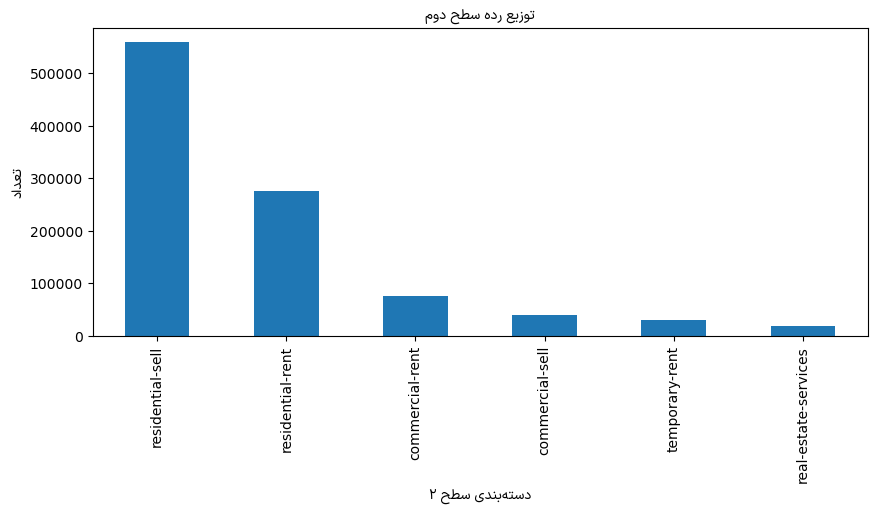

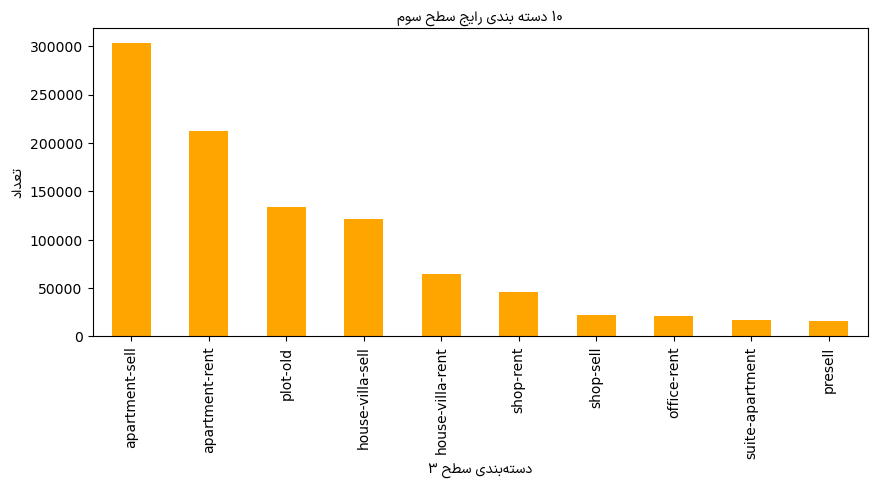

In [4]:
plt.figure(figsize=(10, 4))
# توزیع دسته‌بندی سطح دوم
divar_df['cat2_slug'].value_counts().plot(kind='bar')
plt.title(get_display(arabic_reshaper.reshape("توزیع رده سطح دوم")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("دسته‌بندی سطح ۲")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("تعداد")), fontproperties=font_prop)
plt.show()

plt.figure(figsize=(10, 4))
# دسته‌بندی رایج سطح سوم
divar_df['cat3_slug'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title(get_display(arabic_reshaper.reshape("10 دسته بندی رایج سطح سوم")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("دسته‌بندی سطح ۳")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("تعداد")), fontproperties=font_prop)
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
2.	هیستوگرام سال ساخت را رسم کنید.
</font>
</h4>


In [5]:
df_clean = divar_df[divar_df['construction_year'].astype(str).str.isdigit()]
df_clean['construction_year'] = df_clean['construction_year'].astype(int)

C:\Users\Hamed\AppData\Local\Temp\ipykernel_16364\2004553755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['construction_year'] = df_clean['construction_year'].astype(int)


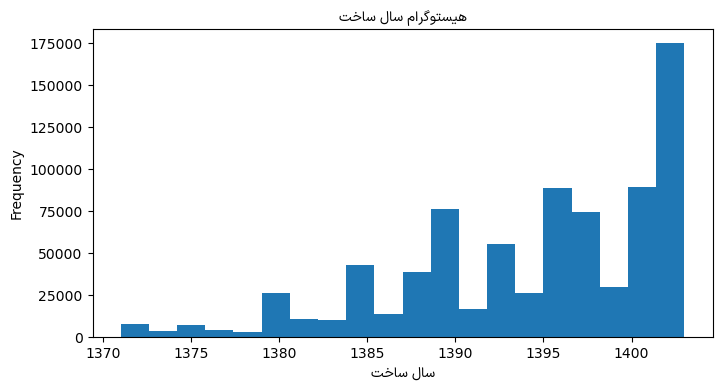

In [6]:
plt.figure(figsize=(8,4))
df_clean['construction_year'].dropna().astype(int).plot.hist(bins=20)
plt.title(get_display(arabic_reshaper.reshape("هیستوگرام سال ساخت")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("سال ساخت")), fontproperties=font_prop)
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
3.	تعداد آگهی‌های منتشر شده در ماه‌های مختلف را برای فروش و اجاره بررسی کنید. آیا تعداد آگهی‌های فروش و اجاره در زمان‌های مشخصی از سال افزایش چشم‌گیری داشته است؟
</font>
</h4>


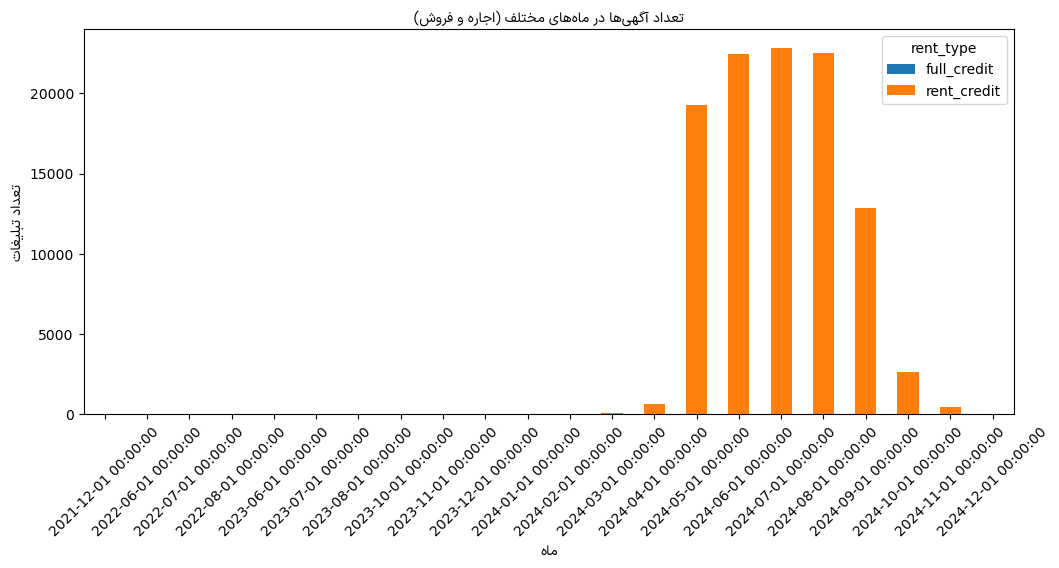

In [7]:
monthly_counts = divar_df.groupby(['created_at_month', 'rent_type']).size().unstack().fillna(0)
monthly_counts.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.title(get_display(arabic_reshaper.reshape("تعداد آگهی‌ها در ماه‌های مختلف (اجاره و فروش)")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("ماه")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("تعداد تبلیغات")), fontproperties=font_prop)
plt.xticks(rotation=45)
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
4.	توزیع قیمت فروش‌(price_value) را برای دسته‌بندی‌های سطح سه در یک نمودار رسم کنید.
</font>
</h4>


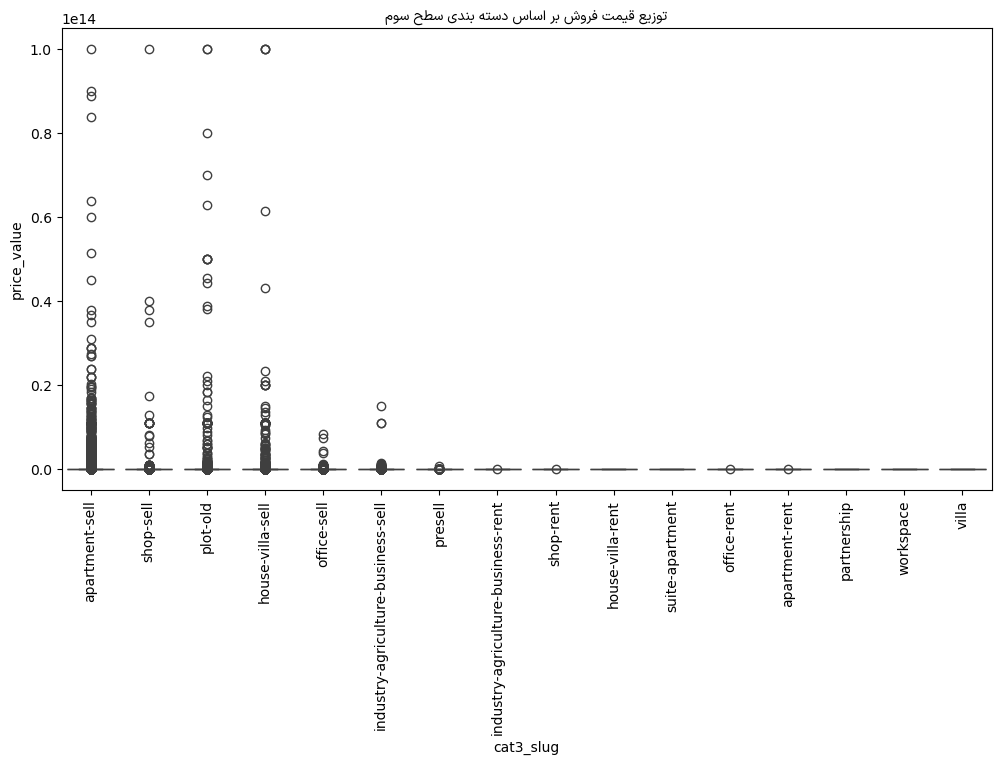

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=divar_df[divar_df['price_value'].notna()], x='cat3_slug', y='price_value')
plt.title(get_display(arabic_reshaper.reshape("توزیع قیمت فروش بر اساس دسته بندی سطح سوم")), fontproperties=font_prop)
plt.xticks(rotation=90)
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
5.	بر روی نقشه‌ی جغرافیایی heatmap آگهی‌های هر منطقه را رسم کنید. تراکم آگهی‌ها کدام منطقه بیشتر است؟
</font>
</h4>


In [9]:
divar_df[['location_latitude', 'location_longitude']].describe()

location_latitude  location_longitude
count      655608.000000       655608.000000
mean           34.982108           51.629743
std             2.379169            3.160920
min            23.626478           40.162369
25%            34.553551           50.677175
50%            35.723312           51.345791
75%            36.307013           51.805291
max            40.358055           74.511620

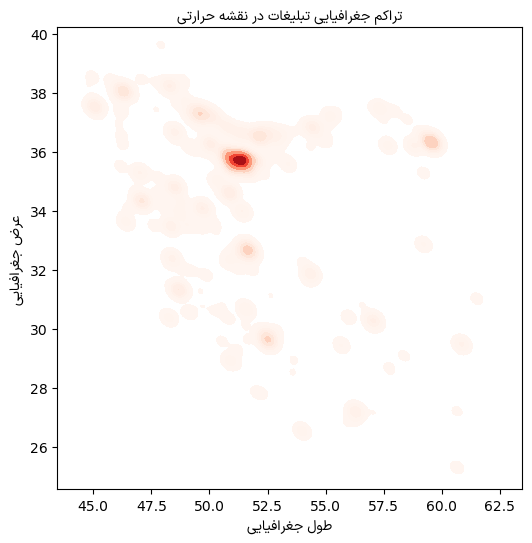

In [10]:
geo_df = divar_df.dropna(subset=['location_latitude', 'location_longitude'])
geo_df = geo_df[
(geo_df['location_latitude'].between(25, 40)) &
(geo_df['location_longitude'].between(44, 63))
]

geo_sample = geo_df.sample(n=min(200000, len(geo_df)), random_state=42)

plt.figure(figsize=(6, 6))
sns.kdeplot(
data=geo_sample,
x='location_longitude', y='location_latitude',
fill=True, cmap='Reds', bw_adjust=0.5
)
plt.title(get_display(arabic_reshaper.reshape("تراکم جغرافیایی تبلیغات در نقشه حرارتی")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("طول جغرافیایی")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("عرض جغرافیایی")), fontproperties=font_prop)
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
Heatmap آگهی‌ها رو روی نقشه واقعی ایران
</font>
</h4>


In [11]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [12]:
import folium
from folium.plugins import HeatMap

In [13]:
geo_df = divar_df.dropna(subset=['location_latitude', 'location_longitude'])
geo_df = geo_df[
(geo_df['location_latitude'].between(25, 40)) &
(geo_df['location_longitude'].between(44, 63))
]

# Sample 200000 points for faster speed
geo_sample = geo_df.sample(n=min(200000, len(geo_df)), random_state=42)

# (center = Tehran)
iran_map = folium.Map(location=[35.7, 51.4], zoom_start=6)

heat_data = geo_sample[['location_latitude', 'location_longitude']].values.tolist()
HeatMap(heat_data, radius=8).add_to(iran_map)

iran_map

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
6.	ترند میانگین قیمت اجاره بر حسب ماه‌های قرار گرفتن آگهی‌ها رسم کنید.(دقت کنید که ماه‌ها باید به تاریخ شمسی و خوانا باشند.)
</font>
</h4>


In [29]:
import jdatetime
from datetime import datetime

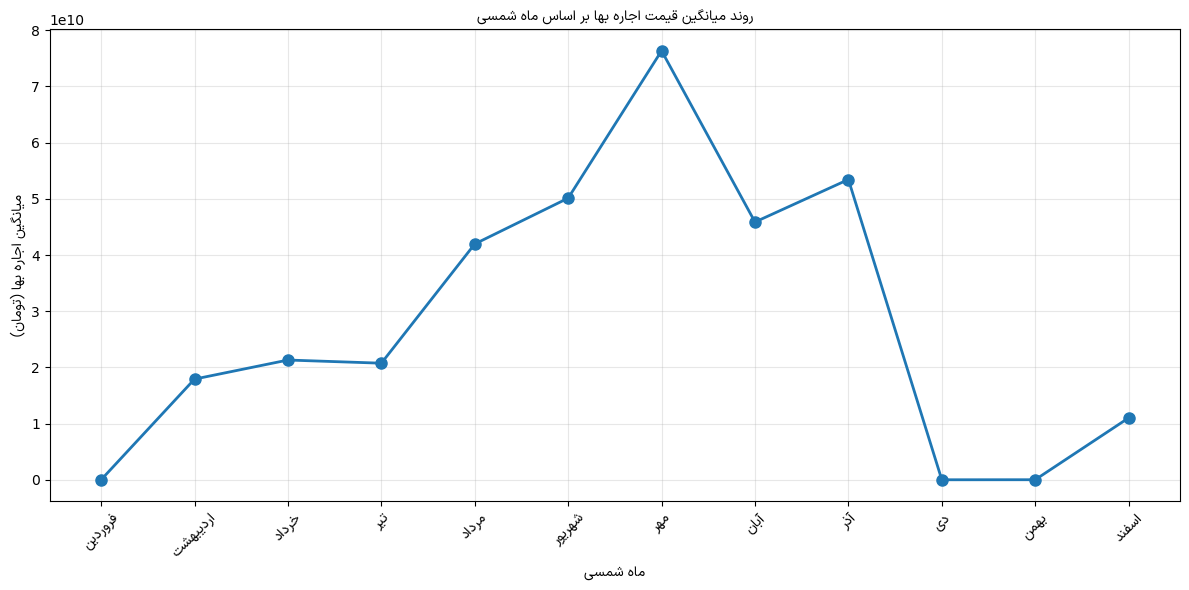

In [ ]:
def convert_to_persian_month(gregorian_date):
    if pd.isna(gregorian_date):
        return None
    try:
        if isinstance(gregorian_date, str):
            dt = datetime.strptime(gregorian_date.split()[0], '%Y-%m-%d')
        else:
            dt = gregorian_date
        persian_date = jdatetime.date.fromgregorian(date=dt.date())
        return persian_date.month
    except:
        return None

persian_month_names = {
    1: 'فروردین', 2: 'اردیبهشت', 3: 'خرداد', 4: 'تیر',
    5: 'مرداد', 6: 'شهریور', 7: 'مهر', 8: 'آبان',
    9: 'آذر', 10: 'دی', 11: 'بهمن', 12: 'اسفند'
}

rent_data = divar_df[divar_df['rent_value'].notna()].copy()
rent_data['persian_month'] = rent_data['created_at_month'].apply(convert_to_persian_month)
rent_data = rent_data[rent_data['persian_month'].notna()]
monthly_rent = rent_data.groupby('persian_month')['rent_value'].mean()

plt.figure(figsize=(12, 6))
sorted_monthly_rent = monthly_rent.sort_index()
months = [persian_month_names.get(int(m), str(m)) for m in sorted_monthly_rent.index]
months_display = [get_display(arabic_reshaper.reshape(month)) for month in months]
x_positions = range(len(months))

plt.plot(x_positions, sorted_monthly_rent.values, marker='o', linewidth=2, markersize=8)
plt.title(get_display(arabic_reshaper.reshape("روند میانگین قیمت اجاره بها بر اساس ماه شمسی")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("ماه")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("میانگین اجاره بها (تومان)")), fontproperties=font_prop)
plt.xticks(x_positions, months_display, rotation=45, fontproperties=font_prop)
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
7.	در طول زمان قیمت‌های اسمی افزایش پیدا می‌کنند اما این افزایش لزوما به معنی بالارفتن ارزش واقعی ملک نیست و می‌تواند ناشی از تورم باشد. به ازای میانگین مبلغ قیمت(price_value) در سال‌های ۱۴۰۰ تا ۱۴۰۳ قیمت حقیقی را محاسبه کنید و بررسی کنید ترند قیمت حقیقی چگونه است. 
</font>
</h4>


<Figure size 1000x400 with 0 Axes>

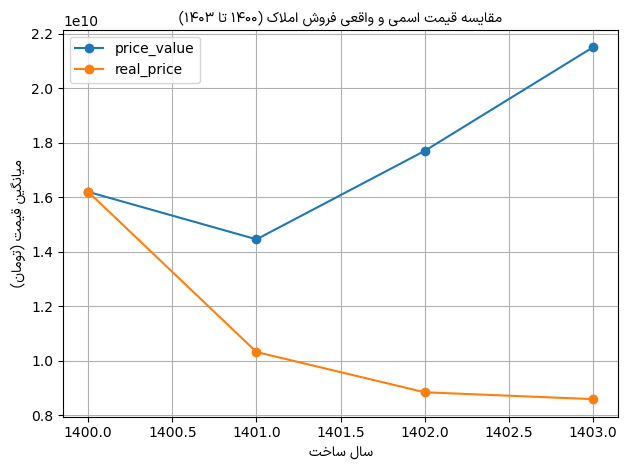

In [30]:
avg_price_by_year = divar_df[['construction_year', 'price_value']].dropna()
avg_price_by_year = avg_price_by_year[avg_price_by_year['construction_year'].astype(str).str.isdigit()]

avg_price_by_year['construction_year'] = avg_price_by_year['construction_year'].astype(int)


inflation_index = {
    1400: 1.00,
    1401: 1.40,
    1402: 2.00,
    1403: 2.50,
}


avg_price_by_year['inflation'] = avg_price_by_year['construction_year'].map(inflation_index)
avg_price_by_year = avg_price_by_year.dropna(subset=['inflation']) 

avg_price_by_year['real_price'] = avg_price_by_year['price_value'] / avg_price_by_year['inflation']

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
avg = avg_price_by_year.groupby('construction_year')[['price_value', 'real_price']].mean()
avg.plot(marker='o')
plt.title(get_display(arabic_reshaper.reshape("مقایسه قیمت اسمی و واقعی فروش املاک (۱۴۰۰ تا ۱۴۰۳)")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("سال ساخت")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("میانگین قیمت (تومان)")), fontproperties=font_prop)
plt.grid(True)
plt.tight_layout()
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
8. ماتریس هم‌بستگی را برای مبلغ قیمت، متراژ زمین، زیربنا، ظرفیت نفرات، تعداد اتاق‌ها و طول و عرض جغرافیایی رسم نمایید.
</font>
</h4>


c:\Users\Hamed\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Hamed\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


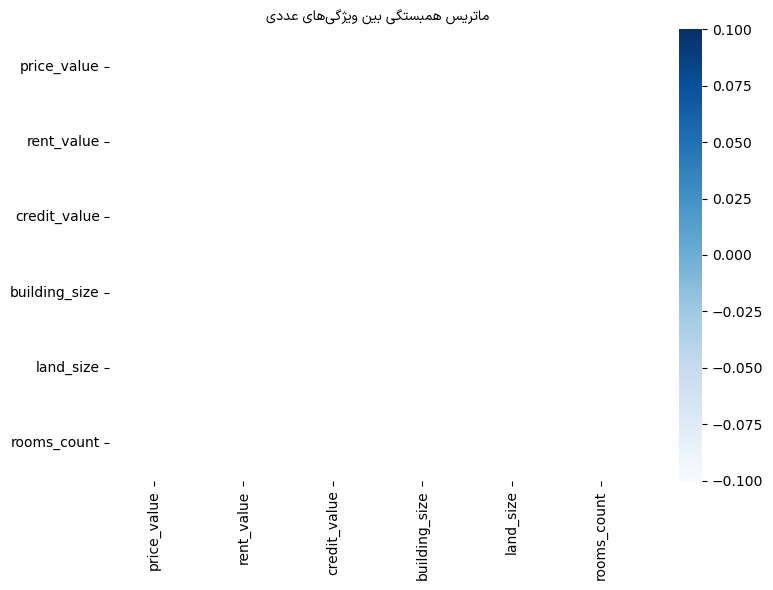

In [18]:
correlation_data = divar_df[[
'price_value', 'rent_value', 'credit_value',
'building_size', 'land_size', 'rooms_count'
]].dropna()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='Blues')
plt.title(get_display(arabic_reshaper.reshape("ماتریس همبستگی بین ویژگی‌های عددی")), fontproperties=font_prop)
plt.tight_layout()
plt.show()

<h4 dir=rtl align=right style="line-height:200%;font-family:IRANSans; padding-right:10px">
<font face="IRANSans">
9.	می‌خواهیم بررسی کنیم خانه‌هایی که دارای بالکن، آسانسور، نگهبان، باربیکیو و استخر هستند عمدتا در کدام مناطق قرار دارند. با نمودار مناسب این موضوع را نشان دهید.
</font>
</h4>


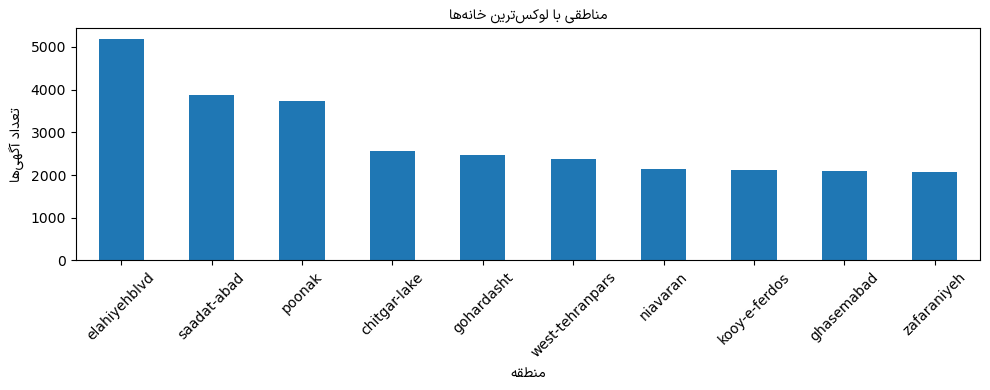

In [5]:
luxury_cols = ['has_pool', 'has_sauna', 'has_jacuzzi', 'has_elevator', 'has_barbecue', 'has_security_guard']
luxury_data = divar_df[divar_df[luxury_cols].any(axis=1)]
luxury_by_area = luxury_data['neighborhood_slug'].value_counts().head(10)

plt.figure(figsize=(10,4))
luxury_by_area.plot(kind='bar')
plt.title(get_display(arabic_reshaper.reshape("مناطقی با لوکس‌ترین خانه‌ها")), fontproperties=font_prop)
plt.xlabel(get_display(arabic_reshaper.reshape("منطقه")), fontproperties=font_prop)
plt.ylabel(get_display(arabic_reshaper.reshape("تعداد آگهی‌ها")), fontproperties=font_prop)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()